In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler




In [ ]:
ingresos = {
    'Id': range(1,21),
    'IngresosAnuales': [15, 16, 17, 18, 19, 20, 45, 46, 47, 50, 55, 60, 85, 86, 88, 89, 120, 125, 130, 135],
    'PuntajeCredito': [600, 580, 640, 670, 700, 720, 540, 550, 580, 590, 710, 740, 750, 770, 790, 810, 820, 830, 840, 850]
}

df = pd.DataFrame(ingresos)

In [3]:
df.head()

,Id,IngresosAnuales,PuntajeCredito
0,1,15,600
1,2,16,580
2,3,17,640
3,4,18,670
4,5,19,700


In [4]:
X = df[['IngresosAnuales', 'PuntajeCredito']]
scaler = StandardScaler()
X_escalado = scaler.fit_transform(X)

In [48]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_escalado)

C:\Users\c_rh_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


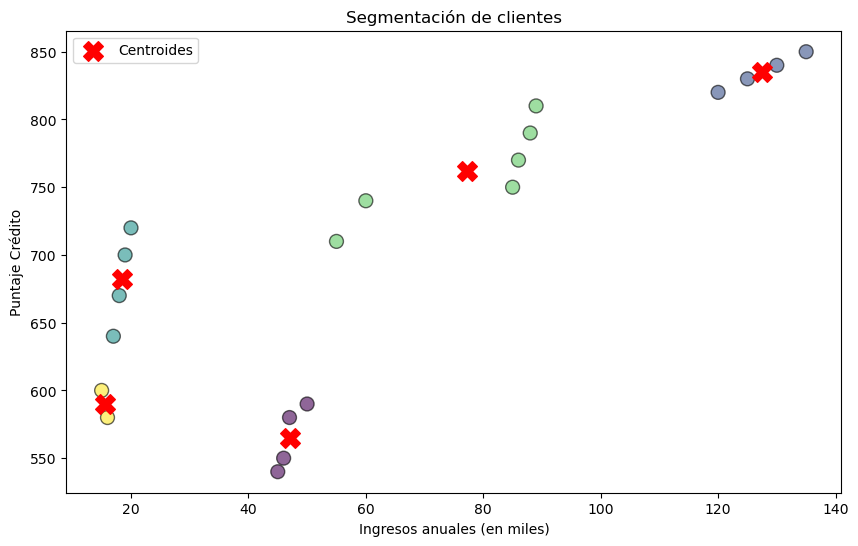

In [50]:
plt.figure(figsize=(10,6))
plt.scatter(df['IngresosAnuales'], df['PuntajeCredito'], c=df['Cluster'], cmap='viridis', s=100,
            alpha=0.6, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:,0] * scaler.scale_[0] + scaler.mean_[0],
            kmeans.cluster_centers_[:,1] * scaler.scale_[1] + scaler.mean_[1],
            c='red', s=200, label='Centroides', marker = 'X')
plt.xlabel('Ingresos anuales (en miles)')
plt.ylabel('Puntaje Crédito')
plt.title('Segmentación de clientes')
plt.legend()
plt.show()

In [7]:
df.head()

,Id,IngresosAnuales,PuntajeCredito,Cluster
0,1,15,600,0
1,2,16,580,0
2,3,17,640,2
3,4,18,670,2
4,5,19,700,2


In [52]:
print(df['Cluster'].value_counts())

Cluster
3    6
2    4
0    4
1    4
4    2
Name: count, dtype: int64


In [18]:
df.describe()

,Id,IngresosAnuales,PuntajeCredito,Cluster
count,20.00000,20.000000,20.000000,20.000000
mean,10.50000,63.300000,704.000000,1.000000
std,5.91608,41.440001,104.196171,0.794719
min,1.00000,15.000000,540.000000,0.000000
25%,5.75000,19.750000,597.500000,0.000000
50%,10.50000,52.500000,715.000000,1.000000
75%,15.25000,88.250000,795.000000,2.000000
max,20.00000,135.000000,850.000000,2.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Id               20 non-null     int64
 1   IngresosAnuales  20 non-null     int64
 2   PuntajeCredito   20 non-null     int64
 3   Cluster          20 non-null     int32
dtypes: int32(1), int64(3)
memory usage: 692.0 bytes


C:\Users\c_rh_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\c_rh_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\c_rh_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\c_rh_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

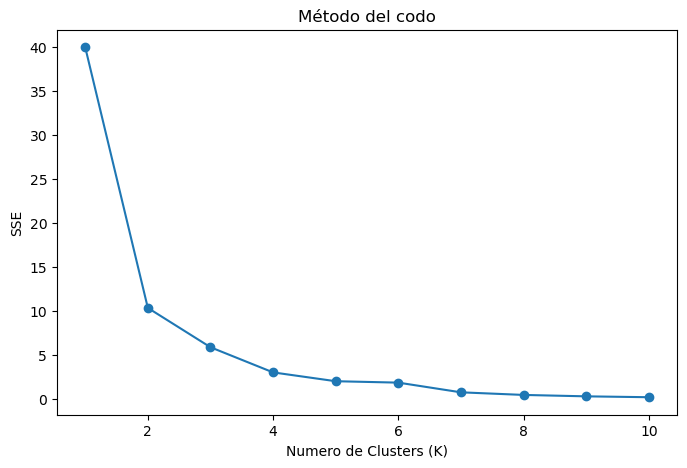

In [54]:
sse = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_escalado)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_values, sse, marker='o')
plt.xlabel('Numero de Clusters (K)')
plt.ylabel('SSE')
plt.title('Método del codo')
plt.show()